<a href="https://colab.research.google.com/github/KruthigaKarunakaran/Deep-Learning-and-Neural-Network/blob/master/Air_Line_passenger_LSTM_timesteps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
# from sklearn.metrics import mean_squared_errorkj

In [0]:
#usecol Return a subset of the columns. 
#, skipfooter=3)
dataset = pd.read_csv('international-airline-passengers.csv',usecols=[1])                

In [14]:
np.shape(dataset)

(144, 1)

In [15]:
dataset.head()

,totals_monthly
0,112
1,118
2,132
3,129
4,121


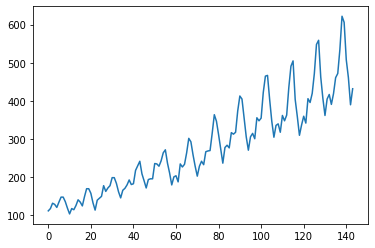

In [16]:
plt.plot(dataset)
plt.show()

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
dataset[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [18]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.


In [19]:
np.shape(train)

(96, 1)

In [0]:
lag=3
if lag==1:
    trainX=train[:-1]
    trainY=train[1:]
    testX=test[:-1]
    testY=test[1:]
   
elif lag==3:
    trainX1=train[:-3,:]
    trainX2=train[1:-2,:]
    trainX3=train[2:-1,:]
    trainY=train[3:,:]
    #-----------------
    testX1=test[:-3,:]
    testX2=test[1:-2,:]
    testX3=test[2:-1,:]

    testY=test[3:,:]
    trainX=np.hstack((trainX1,trainX2,trainX3))
    testX=np.hstack((testX1,testX2,testX3)) 

In [21]:
np.shape(trainX)

(93, 3)

In [22]:
np.shape(trainY)

(93, 1)

In [23]:
trainX[:10,:]

array([[0.01544402, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984556],
       [0.03281853, 0.05984556, 0.08494208],
       [0.05984556, 0.08494208, 0.08494208],
       [0.08494208, 0.08494208, 0.06177606],
       [0.08494208, 0.06177606, 0.02895753],
       [0.06177606, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703]])

In [0]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],1))
testX = testX.reshape((testX.shape[0], testX.shape[1],1)) 

In [25]:
np.shape(trainX)

(93, 3, 1)

Data is now ready to be used as input (X) to the LSTM with an input_shape of (second, third).

In [0]:
model = Sequential()
model.add(LSTM(50, input_shape=(np.shape(trainX[1,:]))))
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY[:,0], epochs=100, batch_size=1, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [40]:
np.shape(trainPredict)

(93, 1)

In [41]:
np.shape(trainY)

(93, 1)

In [44]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 61212499.50 RMSE
Test Score: 114449352.56 RMSE


In [45]:
np.shape(dataset)

(144, 1)

In [46]:
np.shape(testPredict)

(45, 1)

In [47]:
np.shape(trainPredict)

(93, 1)

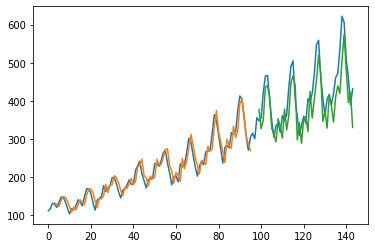

In [48]:
# shift test predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[3:len(trainPredict)+3, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lag*2):len(dataset), :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()